滑动窗口技术展示了如何将嵌套的for循环转变为单一for循环，以此来降低事件复杂度。
让我们引入一个例子来说明这个算法的好处。

给定一个大小为n的数组，计算大小为k的连续子数组的元素和，
并找出元素和最大的子数组

Input  : arr = {100, 200, 300, 400}
         k = 2
Output : 700

Input  : arr = {1, 4, 2, 10, 23, 3, 1, 0, 20}
         k = 4 
Output : 39
我们得到这个最大元素和是通过这个子数组 {4, 2, 10, 23}

Input  : arr = {2, 3}
         k = 3
Output : Invalid
因为总共才有两个元素，所以没有大小为3的子数组。


## 蛮力计算法

In [2]:
# python 代码
def sub_sum(arr,k):
    """
    接收一个数组arr
    计算子数组大小为k的元素和
    返回数值最大的元素和
    """
    # max_sum 代表最后的输出值
    max_sum = 0
    
    # 每一个子数组的索引都从 i 开始     
    for i in range(len(arr)-k+1):
        current_sum = 0
        for j in range(k):
            current_sum = current_sum + arr[i+j]
        
        # 比较大小，更新最大值
        max_sum = max(max_sum,current_sum)
    
    # 返回最大值
    return max_sum
        
# 进行验证
arr = [1,2,3,4,5,6,7,8,9,10]

#对上面那个数组就行验证，且注意这里的子数组大小为 3
sub_sum(arr,3)
# output 27



27

In [ ]:
# c++ 代码
#include <iostream>
using namespace std;

// 返回大小为k的各个子数组的元素和中的最大值
int maxSum(int arr[], int n, int k)
{
    // 初始化结果
    int max_sum = INT_MIN ;
 
    // 所有的子数组都是从i开始的
    for (int i=0; i<n-k+1; i++)
    {
        int current_sum = 0;
        for (int j=0; j<k; j++)
            current_sum = current_sum + arr[i+j];
 
        // 比较大小，更新最大值
        max_sum = max(current_sum , max_sum );
    }
 
    return max_sum;
}
 
// 验证代码
int main()
{
    int arr[] = {1, 4, 2, 10, 2, 3, 1, 0, 20};
    int k = 4;
    int n = sizeof(arr)/sizeof(arr[0]);
    cout << maxSum(arr, n, k);
    return 0;
}

### 点评以上算法以及承上启下

In [ ]:
很明显，以上算法的复杂度很大。

如果用大O表示法，其时间复杂度为O(k*n)

因为其包含两个嵌套for循环

接下来，我们引入 window sliding algorithm（移动开窗算法）

关于此算法一种最直观的表述就是，想象你是如何在公交上打开车窗的！

没错，就是如此简单和形象。

更具体一点便是，你滑动窗户的时候：

不是一点点的连续移动，而是一个单位一个单位的移动。

这就是移动窗口的精髓！

## 移动开窗法

In [ ]:
此算法具体为：

1、用线性循环的方法计算最开始的k个元素和，并存在变量 window_sum 中。

2、然后我们推着这个‘窗口‘按照一个元素的步伐逐步向前走。

3、这一步最关键！为了获得当前子数组的元素和，你只需要将上一个数组的第一个元素扔掉，再加上当前子数组的最后一个元素即可。

In [ ]:
# python 代码
def sub_max(arr,k):
    
    # 计算最开始的 k 个元素
    max_sum = 0
    for i in range(k):
        max_sum = max_sum + arr[i]
        
    # 计算余下的窗口的元素和
    # 去掉上一个窗口的第一个元素
    # 加上这个窗口的最后一个元素
    # 以此得到当前窗口的元素和
    
    window_sum = max_sum
    for i in range(k,len(arr)):
        window_sum = window_sum + arr[i] - arr[i-k]
        max_sum = max(max_sum, window_sum)
        
    return max_sum


In [ ]:
// c++ 代码

#include <iostream>
using namespace std;
 
// 返回大小为k的各个子数组的元素和中的最大值
int maxSum(int arr[], int n, int k)
{
    // k must be greater
    if (n < k)
    {
       cout << "Invalid";
       return -1;
    }
 
    // 计算最开始的k个元素和
    int max_sum = 0;
    
    for (int i=0; i<k; i++)
       max_sum += arr[i];
 
    // 计算余下的窗口的元素和
    // 去掉上一个窗口的第一个元素
    // 加上这个窗口的最后一个元素
    // 以此得到当前窗口的元素和
    int window_sum = max_sum;
    for (int i=k; i<n; i++)
    {
       window_sum += arr[i] - arr[i-k];
       max_sum = max(max_sum, window_sum);
    }
 
    return max_sum;
}
 
// 验证代码
int main()
{
    int arr[] = {1, 4, 2, 10, 2, 3, 1, 0, 20};
    int k = 4;
    int n = sizeof(arr)/sizeof(arr[0]);
    cout << maxSum(arr, n, k);
    return 0;
}

## 二维移动窗口（用矩阵模拟点云）

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 练习 numpy 掩码
a = np.linspace(0,2*np.pi,50)
b = np.sin(a)

In [6]:
b

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16])

In [7]:
mask = b>= 0
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

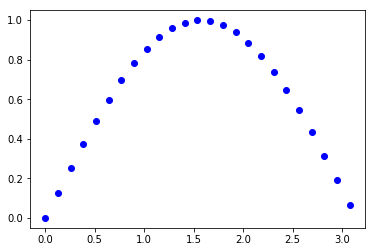

In [8]:
plt.plot(a[mask],b[mask],'bo')

In [10]:
# python 中用 random库生成的随机数
import random
# 生成一个位于 a 与 b 之间的均匀浮点数分布 
print(random.uniform(10,20))
# 生成一个指定范围内的整数
print(random.randint(1,10))

18.188670587673336
7


In [13]:
# python 中用 numpy 库生成的随机数

# 生成 100 万个随机数
nums = np.random.random(size = 1000000)
# 将这100 万个随机数排列成 1000 x 1000 的矩阵
nums.resize(1000,1000)

In [43]:
# 创建一个队列，用来存储每个窗口筛选出来的坐标
from collections import deque
eminem = deque()

def sliding_window_01(height,length,rand_matrix,queue):
    """
    height:表示窗口的高度
    length:表示窗口的长度
    """
    for i in range(int(len(rand_matrix)/length)):
        for j in range(int(len(rand_matrix)/height)):
#             slices = [i:i+length,j:j+height]
            window = rand_matrix[i:i+length,j:j+height]
            minium = window.min()
            index = np.where(window == minium)
            queue.append(index)
 

In [44]:
sliding_window_01(4,4,nums,eminem)


In [45]:
len(eminem)

62500

In [18]:
test = np.arange(12)
test.resize(3,4)
test

m = test[0:2,2:4].min()

type(np.where(test == 0))

type(np.where(test == 0)[0])

test[np.where(test == 0)]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])